## Machine Learning - Ex.3


Submitted by: Raz Gvili

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Logistic regression (1-D)

First, lets generate some 1-D training data:

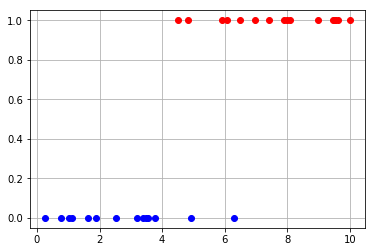

In [2]:
def generate_data_1D (N=30):
    w = np.array([-16,3])
    x = np.random.random((N,1))*10
    X = np.concatenate((np.ones((N,1)),x),axis=1)
    z = np.dot(X,w)
    h = 1/(1+np.exp(-z))
    r = np.random.rand(N)
    y = np.zeros(N)
    y[r<h] = 1
    return x,y

x,y = generate_data_1D()

plt.plot(x[y==0],y[y==0],'ob')
plt.plot(x[y==1],y[y==1],'or')
plt.grid()
plt.show()


Next, implement a *gradient descent* algorithm to solve the *logistic regression* problem:



$$  \hat{y_{}}(\vec{x};\vec{w}) = g(\vec{w}\cdot\vec{x}) $$

where $\vec{x},\vec{w}\in\mathcal{R}^d$ and $g(\cdot)$ is the sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

Assume the input data ($N$ samples) is given in a matrix $X$ of size $N\times d$.



In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def logistical_reg_step_gradient(X, y, w_vec, learning_rate, sampels_amount):
        
    w_grad = np.zeros(w_vec.size)
    y_hat = np.zeros(y.size)
    
    # update each param
    for w_param in range(0, w_vec.size):
        
        # sum of all sampels for each w_param 
        for sample in range(0, sampels_amount):
            
            # Sigmoid calc 
            z = np.dot(w_vec, X[sample])
            y_hat[sample] = sigmoid(z)
            
            w_grad[w_param] += ((y_hat[sample] - y[sample]) * X[sample][w_param])
            
        w_grad[w_param] *= (1/float(sampels_amount))
    
    next_w = w_vec - (learning_rate * w_grad)
    
    
    # J for logistic regression calc
    J_iteration = 0
    for sample in range(0, sampels_amount):
        J_iteration += ( (y[sample] * np.log(y_hat[sample])) + ((1 - y[sample]) * (np.log(1 - y_hat[sample]))) ) 
        
    J_iteration *= (1/float(sampels_amount)) * (-1)
    
    
    return J_iteration, next_w

In [5]:
def gradient_descent (X, y, alpha=0.01, T=100):
    
    sampels_amount = X[:,0].size
     
    X = np.concatenate((np.ones((sampels_amount,1)),x),axis=1)
    
    # to hold the cost function value J at each iteration
    J = np.zeros(T)
    
    # initial guess 
    w = np.zeros(X.shape[1])
    
    for i in range(T):
        J[i], w = logistical_reg_step_gradient(X, y, w, alpha, sampels_amount)
        
    
    return w, J

Use your gradient descent function to fit a logistic model to the training data:

$$  \hat{y_{}}(\vec{x};\vec{w}) = g(\vec{w}\cdot\vec{x}) = g(w_0 + w_1 x)$$

hint: don't forget to add a 'ones' coloumn to the input matrix.

(as always, make sure the algorithm indeed converged).



Finally, plot data points together with the sigmoid regression line. Try to add vertical lines from each data point to the regression line.

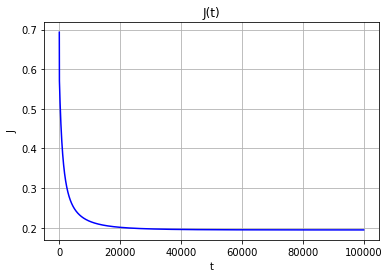

w0:  -7.648669295980715
w1:  1.5263369648217562


In [8]:
T = 100000

w, J = gradient_descent(x, y, 0.01, T)
t = np.linspace(0, T, T)

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()

# w values 
print("w0: ", w[0])
print("w1: ", w[1])


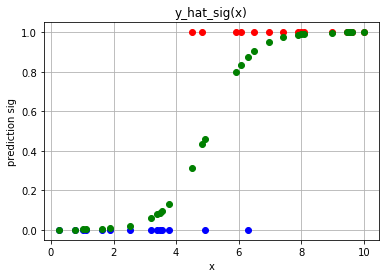

In [9]:
# Plot y_hat(x)

z = w[0] + w[1]*x
y_hat = 1/(1+np.exp(-z))

plt.plot(x[y==0],y[y==0],'ob')
plt.plot(x[y==1],y[y==1],'or')
plt.plot(x, y_hat, 'go')
plt.xlabel('x')

plt.ylabel('prediction sig')
plt.title('y_hat_sig(x)')

plt.grid()
plt.show()



### Logistic regression (2-D)

Lets generate some 2-D training data:



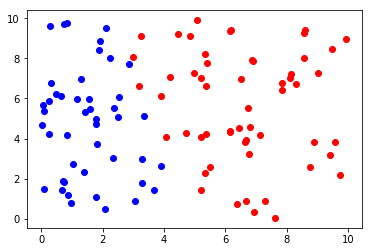

In [15]:
def generate_data_2D (N=100):
    x = np.random.random((N,2))*10
    X = np.concatenate((np.ones((N,1)),x),axis=1);
    w = np.array([-16,3,1])
    z = np.dot(X,w)
    h = 1/(1+np.exp(-z))
    r = np.random.rand(N)
    y = np.zeros(N)
    y[r<h] = 1
    return x,y

x,y = generate_data_2D()

plt.plot(x[y==0,0],x[y==0,1],'ob')
plt.plot(x[y==1,0],x[y==1,1],'or')

plt.show()



Use the same algoirthm from part I, to learn a 2-D logistic model:

$$  \hat{y_{}}(\vec{x};\vec{w}) = g(\vec{w}\cdot\vec{x}) = g(w_0 + w_1 x_1 + w_2 x_2)$$




- Use `meshgrid` and `contour` to plot the 2-D function $g(\vec{w}\cdot\vec{x})$. Use the blue-white-red colormap: cmap=plt.cm.bwr
- Plot the data points (in blue and red) on top of the previous plot
- Try to add a black contour line that represents the *decision boundary*: $g(\vec{w}\cdot\vec{x})=0.5$ 

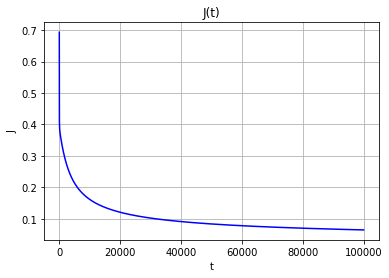

w0:  -12.602314808280024
w1:  2.2837843428188402
w2:  0.8763943437221533


In [12]:
T = 100000

w, J = gradient_descent(x, y, 0.01, T)
t = np.linspace(0, T, T)

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()

# w values 
print("w0: ", w[0])
print("w1: ", w[1])
print("w2: ", w[2])


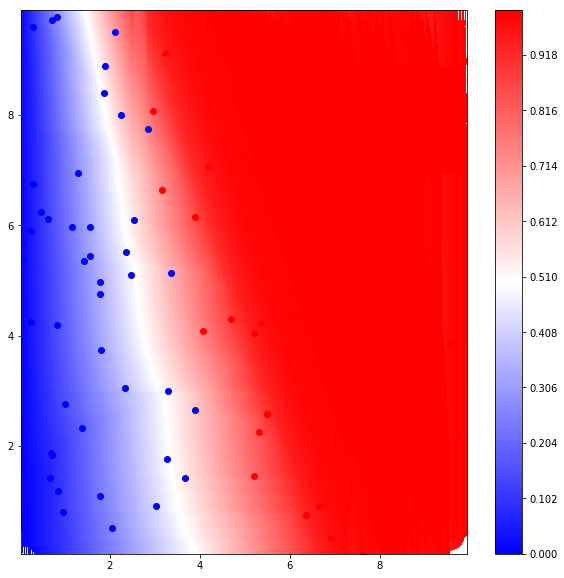

In [20]:
xx1, xx2 = np.meshgrid(x[:,0],x[:,1])
z = w[0] + w[1]*xx1 + w[2]*xx2
yy = sigmoid(z)

plt.figure(figsize=(10,10))

plt.contourf(xx1, xx2, yy, 500, cmap=plt.cm.bwr)
plt.colorbar()

plt.plot(x[y==0,0],x[y==0,1],'ob')
plt.plot(x[y==1,0],x[y==1,1],'or')

plt.show()

## Good luck !